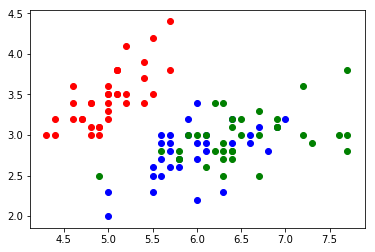

[1 2 0 0 1 2 1 0 0 2 0 2 0 2 2 0 2 0 1 1 2 1 0 2 2 2 2 2 2 2 2 1 1 2 0 0 1
 1 1 0 0 1 1 0 2]
indecies
[[ 72  84  95  70  73  10]
 [  3  46  31  90  93  97]
 [ 88  47  54  12  67   0]
 [  6  67  32   2 102  24]
 [ 20   5  45  26  16  66]
 [ 27  99   5  58 104  34]
 [ 80  29  92  33  48  69]
 [ 87  77  75  54   0  64]
 [ 40  79  38  36  19  35]
 [ 31  50   3  90  46  39]
 [ 75   0  64  54  18  87]
 [ 25  78  43  14  44  11]
 [ 19  36  38  79  77  40]
 [ 99  27 104  34  81   5]
 [ 10   4  70  73  69  48]
 [ 38  19  36  40  77  79]
 [ 48   9  69   4  92  10]
 [ 67  82  51  12   6  24]
 [ 33  23  29  41  80  61]
 [ 99  27   5  45  20  71]
 [ 52  60  76  65  26  66]
 [ 33  23  29  41  80  61]
 [  2 102   6   7  67  47]
 [ 15 103  44  78  14  43]
 [ 27  99   5  58 104  34]
 [ 14  44  78  25  43  11]
 [ 52  60  76  65  26  66]
 [ 28 101  93  45  16  20]
 [ 17  68   8  97  94  42]
 [ 57  58  27  81 104  34]
 [ 43  11  57  81  34 104]
 [ 85  63  33  41  23  29]
 [ 94   8  68  39  21  90]
 [ 58  

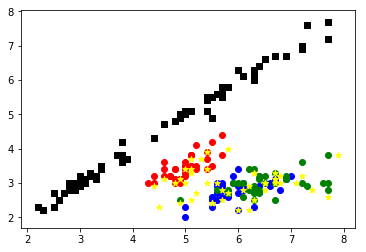

Evaluating K-NN classifier:
test misclassification percentage = 0.0%


In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_iris
from pandas import DataFrame
# Here we have import class neighbors from module named sklearn
from sklearn import neighbors

def main():
    data1=load_iris()
    # Here we are taking only two features from built in datasets i.e iris dataset
    x=data1.data[:,:2]
    y=data1.target
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train,y_train)
    query=x_test
    # Here we predict the value of y_pred for given query of input features(2)
    y_pred=model.predict(query)
    # Here we are trying to plot graph with two features for three different class labels or possible values of y_train(target values)
    # We are using asmatrix attribute of numpy for 2d array i.e. x_class0,x_class1,x_class2 of two features for particular value of class label
    x_class0=np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0])
    x_class1=np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
    x_class2=np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
    # Here REMEMBER we are converting 2D array into 1D array for ploting the values of two features below that's why we put big brackets outside x_class0[:,0] and x_class[:,1]
    plt.scatter([x_class0[:,0]],[x_class0[:,1]],color='red')
    plt.scatter([x_class1[:,0]],[x_class1[:,1]],color='blue')
    plt.scatter([x_class2[:,0]],[x_class2[:,1]],color='green')
    plt.show()
    print(y_pred)
    x=np.array([query[i][0] for i in range(len(query))])
    y=np.array([query[i][1] for i in range(len(query))])
    # Here neighbors is class imported from sklearn and NearestNeighbors is its function and neighbors_object is object of class neighbors
    neighbors_object=neighbors.NearestNeighbors(n_neighbors=6)
    neighbors_object.fit(x_train)
    # Here we are finding the indecies and distances of knearest neighbors of query
    distances,indecies=neighbors_object.kneighbors(query)
    nearest_neighbors_values=x_train[indecies]
    
    print("indecies")
    print(indecies)
    plt.scatter([x_class0[:,0]],[x_class0[:,1]],color='red')
    plt.scatter([x_class1[:,0]],[x_class1[:,1]],color='blue')
    plt.scatter([x_class2[:,0]],[x_class2[:,1]],color='green')
    plt.scatter(x,y,marker='*',color='yellow')
    plt.scatter(nearest_neighbors_values[:,0],nearest_neighbors_values[:,1],color='black',marker='s')
    plt.show()
    # Here we have used the function evaluate_performance for evaluation of test_predictions
    def evaluate_performance(model, query, y_pred):
        test_set_predictions = [model.predict(query[i].reshape((1,len(query[i]))))[0] for i in range(query.shape[0])]
        test_misclassification_percentage = 0
        for i in range(len(test_set_predictions)):
            if test_set_predictions[i]!=y_pred[i]:
                test_misclassification_percentage+=1
        test_misclassification_percentage *= 100/len(y_pred)
        return test_misclassification_percentage

#Evaluate the performances on the validation and test sets
    print("Evaluating K-NN classifier:")
    test_err = evaluate_performance(model, query, y_pred)
    print('test misclassification percentage = {}%'.format(test_err))
if __name__=='__main__':
    main()
    
    
    
